In [1]:
import datapreprocessing as dp
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
import functions as f
import time
import scanpy as sc
import pandas as pd
import pickle
import scvelo as scv



# Which genes are actually significant? 
Looking at the curves for pca they peak at: 0.18 or 0.16 (see GeneAnalysis.ipynb)
Idea: look at all coefficients, let 100 regresions or so run, and then count. 
How did I calculate the mean before? dont know..

# Running regressions. Have one big data frame, run through different clusterings.

Is a view enough? can I just get the samples clustered to cluster 2.

In [2]:
vdata = sc.read_h5ad('velocity_adata.h5ad')
sc.pp.scale(vdata, layer='Ms')
sc.pp.scale(vdata, layer='velocity')

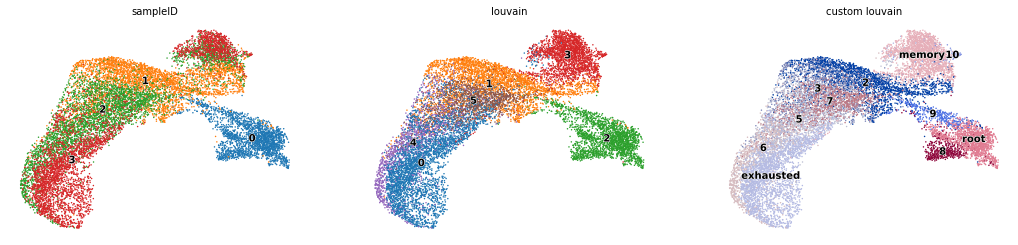

In [3]:
scv.pl.umap(vdata, color=['sampleID', 'louvain', 'custom_louvain'], legend_loc='on data')

In [4]:
a = vdata[:, vdata.var['velocity_genes']]
tot = vdata[a.obs['louvain']=='1',:]
X = tot[:, ['Klf2', 'Mcm3', 'Hif1a', 'Tcf7']].to_df('Ms')
y = tot[:, vdata.var['velocity_genes']].to_df('velocity')
X

index,Klf2,Mcm3,Hif1a,Tcf7
index,,,,
ACTGATGTCACATAGC-1-0,0.457372,1.972917,-0.047751,-0.514100
ATCGAGTCATGGTCTA-1-0,0.704303,0.688715,1.468547,1.584417
CAAGATCAGTTACCCA-1-0,0.064711,1.672428,0.847668,-0.217980
CACATTTGTTACGACT-1-0,0.655255,0.480409,1.554462,0.735917
CGGAGTCTCTTCGAGA-1-0,0.238698,1.728375,0.019308,-0.514100
...,...,...,...,...
CGAGAAGAGTACGATA-1-3,0.519499,-0.365106,-0.601957,-0.404495
GTAGGCCGTTCTCATT-1-3,0.456734,0.765810,-0.880705,-0.514100
TAAACCGGTGGTTTCA-1-3,-0.330137,1.307480,0.547765,0.818922


In [16]:
#vdata.var.index[vdata.var['velocity_genes'] == True].tolist()
pred, X, velo, Y = dp.get_data(predictors = 'tf160', louvain=True)

In [41]:
X['louvain'].cat.categories.tolist()

['0', '1', '2', '3', '4', '5']

In [33]:
v = pd.read_pickle('linearCluster/Scores.pkl')
v

,estimator,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error
0,LinearRegression(),0.325377,0.409137,-0.561340,-0.488180
1,LinearRegression(),0.327341,0.408993,-0.543980,-0.489715
2,LinearRegression(),0.315362,0.410223,-0.564214,-0.487730
3,LinearRegression(),0.340590,0.408514,-0.541547,-0.490040
4,LinearRegression(),0.320229,0.409449,-0.548954,-0.489544
5,LinearRegression(),0.337129,0.408212,-0.534013,-0.490684
6,LinearRegression(),0.318386,0.409875,-0.549027,-0.489283
7,LinearRegression(),0.316886,0.410269,-0.553651,-0.488902
8,LinearRegression(),0.307773,0.410967,-0.580301,-0.486212
9,LinearRegression(),0.317440,0.410016,-0.565435,-0.487591


In [28]:
v = pd.read_pickle('linearQuick/Scores.pkl')
v

,estimator,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_proportion,train_proportion
0,LinearRegression(),0.263269,0.281511,-0.747137,-0.717104,-0.046793,-0.057503
1,LinearRegression(),0.262485,0.281671,-0.733533,-0.718555,-0.045727,-0.057589
2,LinearRegression(),0.258398,0.282141,-0.747581,-0.717022,-0.041595,-0.058130
3,LinearRegression(),0.255117,0.282435,-0.740621,-0.717768,-0.041779,-inf
4,LinearRegression(),0.258816,0.282045,-0.742142,-0.717648,-0.044364,-inf
5,LinearRegression(),0.262216,0.281655,-0.734890,-0.718441,-0.045732,-inf
6,LinearRegression(),0.261884,0.281664,-0.730808,-0.718906,-0.054882,-0.057377
7,LinearRegression(),0.257933,0.282157,-0.739761,-0.717898,-0.042695,-0.058226
8,LinearRegression(),0.258252,0.282081,-0.732912,-0.718649,-0.043662,-0.057380
9,LinearRegression(),0.266482,0.281193,-0.732010,-0.718772,-0.045935,-0.057534


In [6]:
t = vdata[:, ['Klf2', 'Mcm3', 'Hif1a', 'Tcf7']].to_df('Ms')
t['louvain']= vdata.obs['louvain']
t

index,Klf2,Mcm3,Hif1a,Tcf7,louvain
index,,,,,
AACTCTTCACGAGAGT-1-0,-0.890570,1.730505,0.150851,-0.276533,2
AAGACCTAGCGTGTCC-1-0,-0.674589,1.279034,-0.677637,-0.448905,2
AAACCTGAGCAGACTG-1-0,-0.910900,1.178916,-0.250628,-0.000281,2
AACTGGTTCGTCCAGG-1-0,0.260586,1.289911,1.501355,-0.169010,2
AACGTTGGTCAGAATA-1-0,-0.916975,1.221119,-0.298497,0.010500,2
...,...,...,...,...,...
TTTGCGCGTGGCAAAC-1-3,-0.358287,-0.933755,1.980513,3.875497,3
TTTACTGTCCTTTCGG-1-3,-0.871020,-0.698699,-0.733506,-0.514100,0
TTGTAGGGTTCTGTTT-1-3,3.213595,-0.479485,-0.441346,-0.514100,4


In [7]:
vdata.obs['louvain']

index
AACTCTTCACGAGAGT-1-0    2
AAGACCTAGCGTGTCC-1-0    2
AAACCTGAGCAGACTG-1-0    2
AACTGGTTCGTCCAGG-1-0    2
AACGTTGGTCAGAATA-1-0    2
                       ..
TTTGCGCGTGGCAAAC-1-3    3
TTTACTGTCCTTTCGG-1-3    0
TTGTAGGGTTCTGTTT-1-3    4
TTTATGCTCAATACCG-1-3    3
TTGGCAAGTCTTCTCG-1-3    0
Name: louvain, Length: 13694, dtype: category
Categories (6, object): ['0', '1', '2', '3', '4', '5']

In [8]:
ms = vdata[:, ['Klf2', 'Mcm3', 'Hif1a', 'Tcf7']].to_df('Ms')
ms['louvain'] = vdata[:, ['Klf2', 'Mcm3', 'Hif1a', 'Tcf7']].obs['louvain']
ms['sampleID'] = vdata[:, ['Klf2', 'Mcm3', 'Hif1a', 'Tcf7']].obs['sampleID']
ms

index,Klf2,Mcm3,Hif1a,Tcf7,louvain,sampleID
index,,,,,,
AACTCTTCACGAGAGT-1-0,-0.890570,1.730505,0.150851,-0.276533,2,0
AAGACCTAGCGTGTCC-1-0,-0.674589,1.279034,-0.677637,-0.448905,2,0
AAACCTGAGCAGACTG-1-0,-0.910900,1.178916,-0.250628,-0.000281,2,0
AACTGGTTCGTCCAGG-1-0,0.260586,1.289911,1.501355,-0.169010,2,0
AACGTTGGTCAGAATA-1-0,-0.916975,1.221119,-0.298497,0.010500,2,0
...,...,...,...,...,...,...
TTTGCGCGTGGCAAAC-1-3,-0.358287,-0.933755,1.980513,3.875497,3,3
TTTACTGTCCTTTCGG-1-3,-0.871020,-0.698699,-0.733506,-0.514100,0,3
TTGTAGGGTTCTGTTT-1-3,3.213595,-0.479485,-0.441346,-0.514100,4,3


In [9]:
a = vdata[:, vdata.var['velocity_genes']]
vdata[a.obs['louvain']=='7',:]

View of AnnData object with n_obs × n_vars = 0 × 8009
    obs: '_X', '_Y', 'sampleID', 'custom_louvain', 'louvain', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'custom_clustering'
    var: 'Accession-0', 'Chromosome-0', 'End-0', 'Start-0', 'Strand-0', 'Accession-1', 'Chromosome-1', 'End-1', 'Start-1', 'Strand-1', 'Accession-2', 'Chromosome-2', 'End-2', 'Start-2', 'Strand-2', 'Accession-3', 'Chromosome-3', 'End-3', 'Start-3', 'Strand-3', 'Accession-4', 'Chromosome-4', 'End-4', 'Start-4', 'Strand-4', 'Accession-5', 'Chromosome-5', 'End-5', 'Start-5', 'Strand-5', 'gene_count_corr', 'velocity_gamma', 'velocity_r2', 'velocity_genes', 'mean', 'std'
    uns: 'Clusters_colors', 'T_backward', 'T_forward', 'cluster_key', 'custom_clustering_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'sampleID_colors', 'true_lineages', 'velocity_graph', 'velocity_graph_neg', 'velocity_params', 'custom_louvain_c

In [10]:
ms = vdata[:, ['Klf2', 'Mcm3', 'Hif1a', 'Tcf7']].to_df('Ms')
ms['louvain'] = vdata[:, ['Klf2', 'Mcm3', 'Hif1a', 'Tcf7']].obs['louvain']
ms['sampleID'] = vdata[:, ['Klf2', 'Mcm3', 'Hif1a', 'Tcf7']].obs['sampleID']
ms

index,Klf2,Mcm3,Hif1a,Tcf7,louvain,sampleID
index,,,,,,
AACTCTTCACGAGAGT-1-0,-0.890570,1.730505,0.150851,-0.276533,2,0
AAGACCTAGCGTGTCC-1-0,-0.674589,1.279034,-0.677637,-0.448905,2,0
AAACCTGAGCAGACTG-1-0,-0.910900,1.178916,-0.250628,-0.000281,2,0
AACTGGTTCGTCCAGG-1-0,0.260586,1.289911,1.501355,-0.169010,2,0
AACGTTGGTCAGAATA-1-0,-0.916975,1.221119,-0.298497,0.010500,2,0
...,...,...,...,...,...,...
TTTGCGCGTGGCAAAC-1-3,-0.358287,-0.933755,1.980513,3.875497,3,3
TTTACTGTCCTTTCGG-1-3,-0.871020,-0.698699,-0.733506,-0.514100,0,3
TTGTAGGGTTCTGTTT-1-3,3.213595,-0.479485,-0.441346,-0.514100,4,3


In [11]:
pd.concat([vdata[:, ['Klf2', 'Mcm3', 'Hif1a', 'Tcf7']].to_df('Ms'), 
vdata[:, ['Klf2', 'Mcm3', 'Hif1a', 'Tcf7']].obs['louvain']])

,0,Hif1a,Klf2,Mcm3,Tcf7
index,,,,,
AACTCTTCACGAGAGT-1-0,NaN,0.150851,-0.890570,1.730505,-0.276533
AAGACCTAGCGTGTCC-1-0,NaN,-0.677637,-0.674589,1.279034,-0.448905
AAACCTGAGCAGACTG-1-0,NaN,-0.250628,-0.910900,1.178916,-0.000281
AACTGGTTCGTCCAGG-1-0,NaN,1.501355,0.260586,1.289911,-0.169010
AACGTTGGTCAGAATA-1-0,NaN,-0.298497,-0.916975,1.221119,0.010500
...,...,...,...,...,...
TTTGCGCGTGGCAAAC-1-3,3,NaN,NaN,NaN,NaN
TTTACTGTCCTTTCGG-1-3,0,NaN,NaN,NaN,NaN
TTGTAGGGTTCTGTTT-1-3,4,NaN,NaN,NaN,NaN


Okay. So random forest gives me back a feature importance, which is something I could look at and also permut permutations to find the significance. The oob error is comparable to CV-> dont really need to do CV, will just run the random forest 10 times and save everything ?

THis is fastest. Then can run CV individually on each gene, will be a sidestep from what I did before.. maybe need to pass: multioutput or something.. and then have an individual catch for rf to look for feature importance. 
theoretically we can also calculate the mean/sd... maybe do both? 
1. run eveything with only feature importance
2. compare models. look into making one better... 

In [12]:
coefs = pd.read_pickle('rf/Coefs.pkl')

In [13]:
f.help_pivot_to_df(coefs)


,target,predictors,coefficients
0,Mrpl15,Klf2,0.009761
1,Mrpl15,Mcm5,0.009865
2,Mrpl15,Mcm6,0.008305
3,Mrpl15,Mcm3,0.004619
4,Mrpl15,Ung,0.002743
...,...,...,...
1685675,Erdr1,Tnfrsf9,0.011305
1685676,Erdr1,Top2a,0.003351
1685677,Erdr1,Ubc,0.003736
1685678,Erdr1,Vim,0.003196


In [14]:
res

NameError: name 'res' is not defined

In [ ]:
import numpy as np
depth = [t.estimators_[0].tree_.max_depth for t in res['estimator']]
depth

In [ ]:
[x[1] for x in list(zip(res['estimator'],res['target']))]

In [ ]:
import joblib

In [ ]:
# imported and saved this. sounds good. 
joblib.dump(model, "./rftree/simple_rf_Mrpl15.joblib")

In [ ]:
#somehow the coefficeints, the dimensinos have to be transposed, pls.coef returns different dimensions. is this only for pca?
coefs, scores = f.generating_regressions(model, predictors, velocity_genes, X, y, 10, path = filepath, transpose_coefs=True)

coefs = f.help_pivot_to_df(coefs)

permut = f.evaluate_permutations(coefs, database_file, path = filepath)
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("THis is the time passed: {:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))